In [29]:
import matplotlib.pyplot as plt
import json
import math
import numpy as np
#"log_221203_230329.txt"

In [30]:
db = {}
with open("log_221203_230329.txt") as f:
    lines = [line for line in f.readlines() if line.strip()]
    for line in lines:
        data = json.loads(line)
        for reading in data:
            if reading['deviceId'] not in db:
                db[reading['deviceId']] = {}
            db[reading['deviceId']][reading['timestamp']]= {
                "pulse": reading["sensors"][0]["input"]['pulseOxygen'][0:2],
                "GPS" : reading['sensors'][1]["input"]['location'],
                "humidity" : reading['sensors'][2]["input"]['humidity'],
                "temperature" : reading['sensors'][3]["input"]['temperature']
            }

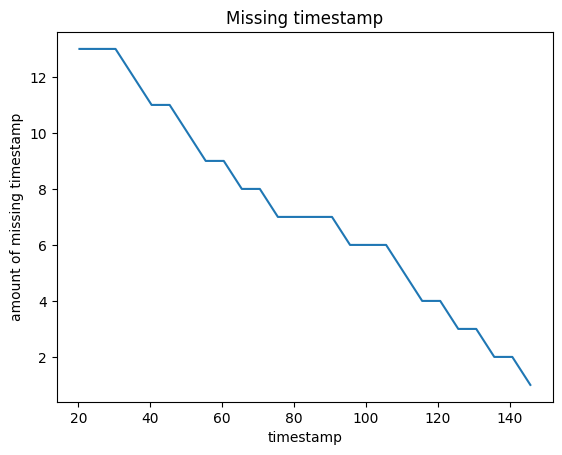

In [31]:
#'637d4dbc59f47e001d9780cd_29'
# poachers
timestamp = []

for key in db['637d4dbc59f47e001d9780cd_29']:
    timestamp.append(key)
    
missingTime = {}

for time in timestamp:
    for device,timedict in db.items():
        if time not in timedict:
            if time not in missingTime:
                missingTime[time] = []
            missingTime[time].append(device[-2:])

y = []

for key in missingTime:
    y.append(len(missingTime[key]))
    
x = [key for key in missingTime]

plt.plot(x,y)
plt.ylabel("amount of missing timestamp")
plt.xlabel("timestamp")
plt.title("Missing timestamp")
plt.show()


In [32]:
#Code from https://janakiev.com/blog/gps-points-distance-python/

def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))


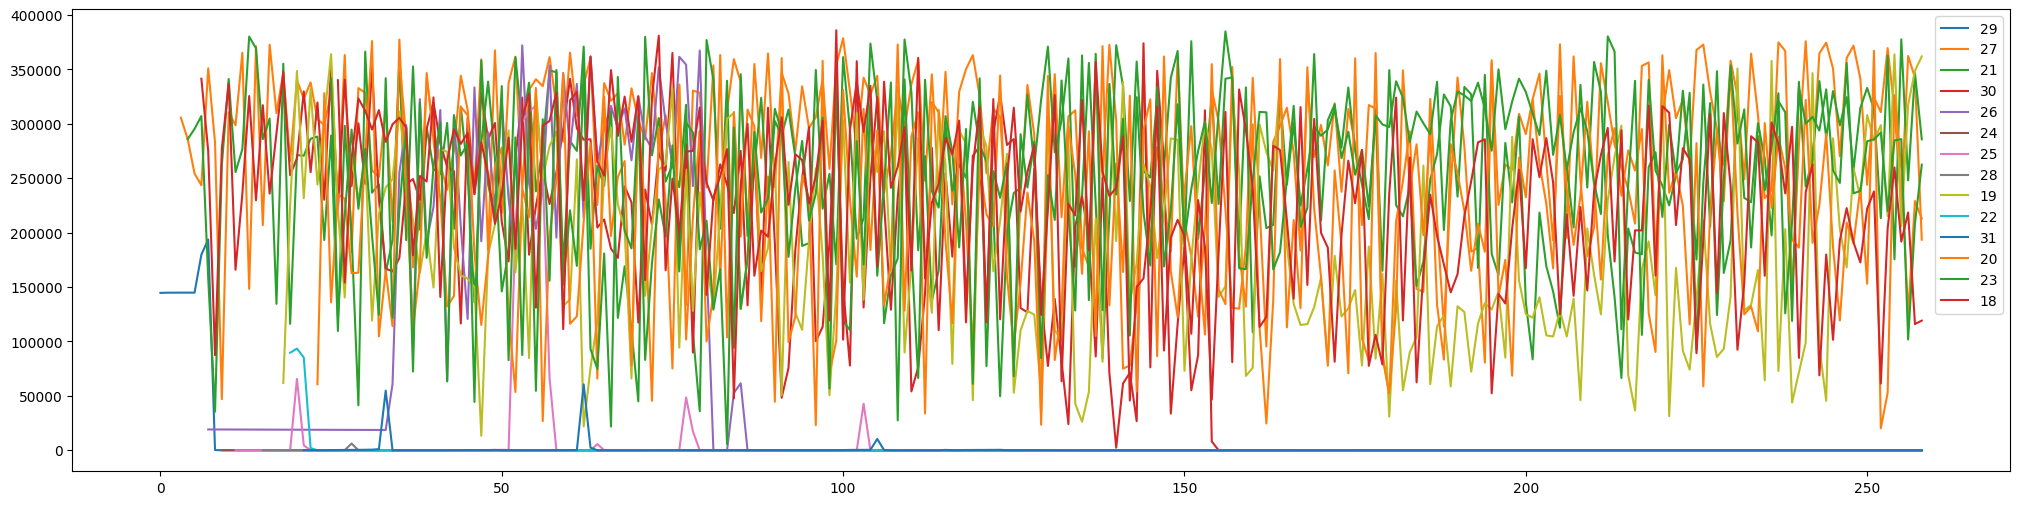

In [53]:
#CDF

speed = {}
for key in db:
    speed[key[-2:]]=[]

for time_s,time_e in zip(timestamp[:-1],timestamp[1:]):
    time = round(time_e - time_s,2)
    for device,timedict in db.items():
        if time_s not in timedict or time_e not in timedict:
            speed[device[-2:]].append(np.NAN)
        else:
            c1 = timedict[time_s]['GPS']
            c2 = timedict[time_e]['GPS']
            speed[device[-2:]].append(round(haversine(c1, c2)/time,2))

plt.figure(figsize=(25,6))

for key,value in speed.items():
    plt.plot(value,label=key)

plt.legend()
plt.show()

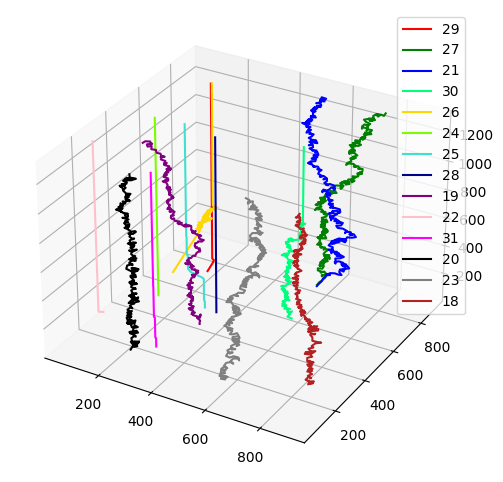

In [54]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.set_prop_cycle(color=['red','green','blue','springgreen','gold','lawngreen','turquoise','darkblue','purple','pink','magenta','black','gray','firebrick'])
for device,timedict in db.items():
    x = []
    y = []
    for time in timestamp:
        if time not in timedict:
            x.append(np.NAN)
            y.append(np.NAN)     
        else:
            x.append(timedict[time]['GPS'][0])
            y.append(timedict[time]['GPS'][1])
    plt.plot(x,y,timestamp,label=device[-2:])
plt.legend()
#ax.view_init(90,90)
plt.show()

color = plt.cm.nipy_spectral
       
